In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# EDA

In [2]:
# Load the data
# i am using "amazon alexa reviews" dataset from kaggle
data = pd.read_csv('/content/amazon_alexa.tsv', sep='\t')
print(f"dataset shape: {data.shape}")

dataset shape: (3150, 5)


In [3]:
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [4]:
# check null values
print(data.isna().sum())

rating              0
date                0
variation           0
verified_reviews    1
feedback            0
dtype: int64


there is only one record with null value

In [5]:
# getting that record
data[data['verified_reviews'].isna() == True]

,rating,date,variation,verified_reviews,feedback
473,2,29-Jun-18,White,NaN,0


In [6]:
# drop it
data.dropna(inplace=True)

In [7]:
data.shape

(3149, 5)

In [8]:
# adding length collumn to the dataset
data['length'] = data['verified_reviews'].apply(len)
data.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [9]:
print(data.dtypes)

rating               int64
date                object
variation           object
verified_reviews    object
feedback             int64
length               int64
dtype: object


### Analysing **'rating'** column

In [10]:
print(data['rating'].value_counts())

rating
5    2286
4     455
1     161
3     152
2      95
Name: count, dtype: int64


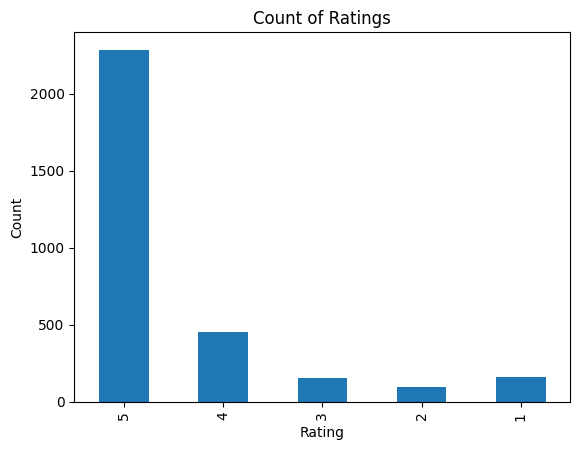

In [11]:
# barplot for rating column count
data['rating'].value_counts().sort_index(ascending=False).plot.bar()
plt.title('Count of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [12]:
print(f"Rating count percentage distribution:\n {round((data['rating'].value_counts()/len(data)*100), 2)}")

Rating count percentage distribution:
 rating
5    72.59
4    14.45
1     5.11
3     4.83
2     3.02
Name: count, dtype: float64


Text(0, 0.5, '')

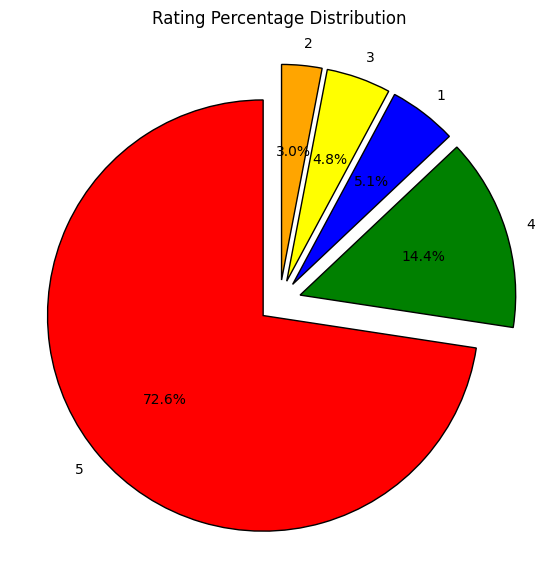

In [13]:
# pie chart
fig = plt.figure(figsize=(7, 7))
colors = ['red', 'green', 'blue', 'yellow', 'orange']
wp = {'linewidth': 1, 'edgecolor': "black"}
explode = [0.1, 0.1, 0.1, 0.1, 0.1]
data['rating'].value_counts().plot(kind='pie', wedgeprops=wp, startangle=90, colors=colors, explode=explode,autopct='%1.1f%%')
plt.title('Rating Percentage Distribution')
plt.ylabel('')

### Analyzing **feedback** column

In [14]:
# count of feedback column
print(data['feedback'].value_counts())

feedback
1    2893
0     256
Name: count, dtype: int64


In [15]:
print(f"Feedback count percentage distribution:\n {round((data['feedback'].value_counts()/len(data)*100), 2)}")

Feedback count percentage distribution:
 feedback
1    91.87
0     8.13
Name: count, dtype: float64


In [16]:
# Extracting the 'verified reviews' value for 5 record with feeback = 1
reviews_1 = data[data['feedback'] == 1]['verified_reviews'].values[:5]
for i, review in enumerate(reviews_1):
    print(f"Review {i+1}: {review}")

Review 1: Love my Echo!
Review 2: Loved it!
Review 3: Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home.
Review 4: I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.
Review 5: Music


In [17]:
# Extracting the 'verified reviews' value for 5 record with feeback = 0
reviews_0 = data[data['feedback'] == 0]['verified_reviews'].values[:5]
for i, review in enumerate(reviews_0):
    print(f"Review {i+1}: {review}")

Review 1: It's like Siri, in fact, Siri answers more accurately then Alexa.  I don't see a real need for it in my household, though it was a good bargain on prime day deals.
Review 2: Sound is terrible if u want good music too get a bose
Review 3: Not much features.
Review 4: Stopped working after 2 weeks ,didn't follow commands!? Really fun when it was working?
Review 5: Sad joke. Worthless.


From analysis in above two cells we can see that:

*   **feedback = 0**: negative review
*   **feedback = 1**: positive review




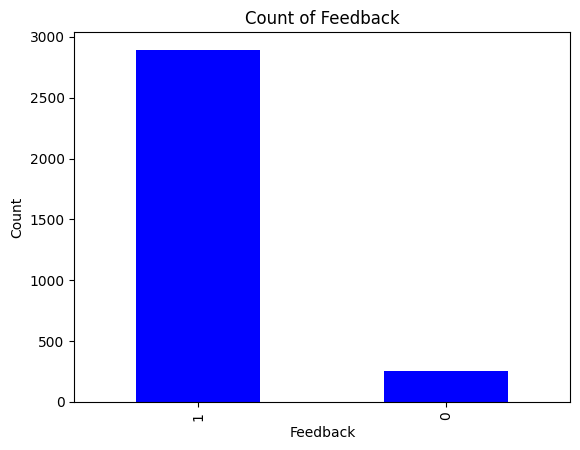

In [18]:
data['feedback'].value_counts().plot.bar(color='blue')
plt.title('Count of Feedback')
plt.xlabel('Feedback')
plt.ylabel('Count')
plt.show()

Text(0, 0.5, '')

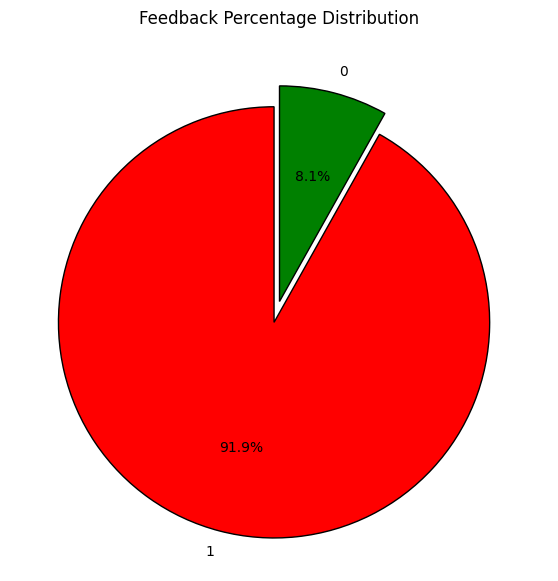

In [19]:
# pie chart
fig = plt.figure(figsize=(7, 7))
colors = ['red', 'green']
wp = {'linewidth': 1, 'edgecolor': "black"}
explode = [0.1, 0]
data['feedback'].value_counts().plot(kind='pie', wedgeprops=wp, startangle=90, colors=colors, explode=explode,autopct='%1.1f%%')
plt.title('Feedback Percentage Distribution')
plt.ylabel('')

Now understanding the ratings column

In [20]:
# for feedback = 0
print(data[data['feedback'] == 0]['rating'].value_counts())

rating
1    161
2     95
Name: count, dtype: int64


In [21]:
# for feedback = 1
print(data[data['feedback'] == 1]['rating'].value_counts())

rating
5    2286
4     455
3     152
Name: count, dtype: int64


if rating of a review is 1 or 2 then the feedback is 0(negative)

and it it is 3, 4 or 5 then the feedback is 1 (positive)

### Now analyzing the **'variation'** column

In [22]:
# variation column
print(data['variation'].value_counts())

variation
Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
Sandstone Fabric                 90
White                            90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: count, dtype: int64


In [23]:
# percentage count
print(round((data['variation'].value_counts()/len(data)*100), 2))

variation
Black  Dot                      16.39
Charcoal Fabric                 13.66
Configuration: Fire TV Stick    11.11
Black  Plus                      8.57
Black  Show                      8.42
Black                            8.29
Black  Spot                      7.65
White  Dot                       5.84
Heather Gray Fabric              4.99
White  Spot                      3.46
Sandstone Fabric                 2.86
White                            2.86
White  Show                      2.70
White  Plus                      2.48
Oak Finish                       0.44
Walnut Finish                    0.29
Name: count, dtype: float64


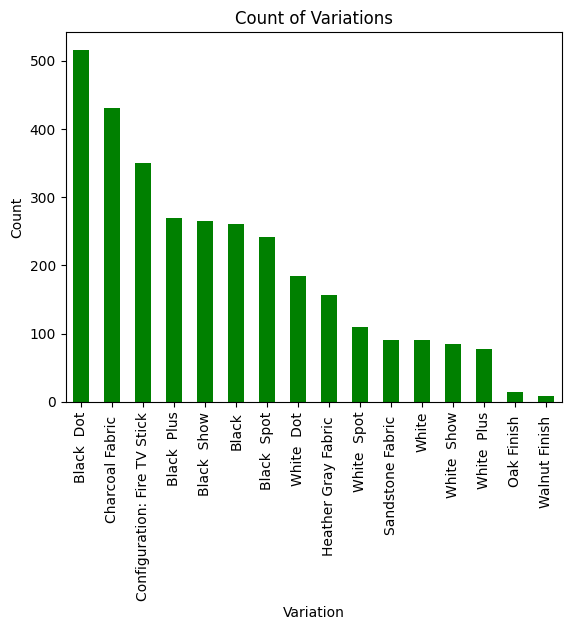

In [24]:
# bar plot for variation column
data['variation'].value_counts().plot.bar(color='green')
plt.title('Count of Variations')
plt.xlabel('Variation')
plt.ylabel('Count')
plt.show()

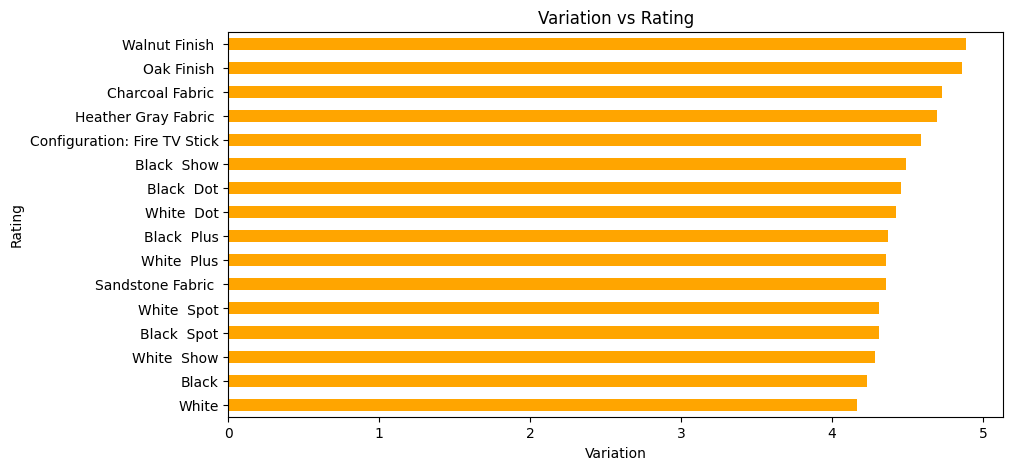

In [25]:
# comparing variation with rating
fig = plt.figure(figsize=(10, 5))
data.groupby('variation')['rating'].mean().sort_values().plot.barh(color='orange')
plt.title('Variation vs Rating')
plt.xlabel('Variation')
plt.ylabel('Rating')
plt.show()

### Analyzing the **'verified_reviews'** column

In [26]:
print(data['length'].describe())

count    3149.000000
mean      132.090187
std       182.114569
min         1.000000
25%        30.000000
50%        74.000000
75%       165.000000
max      2851.000000
Name: length, dtype: float64


In [27]:
print(data[data['length'] == 1]['verified_reviews'][:7])

60     😍
85      
183     
219     
374     
406     
524     
Name: verified_reviews, dtype: object


Text(0.5, 0, 'Length')

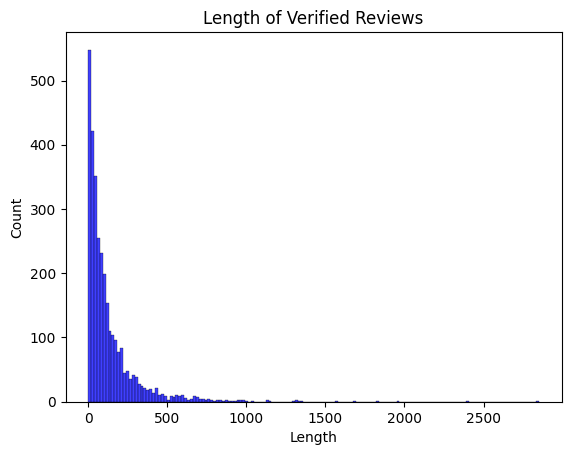

In [28]:
sns.histplot(data['length'], kde=False, color='blue')
plt.title('Length of Verified Reviews')
plt.xlabel('Length')

Text(0.5, 0, 'Length')

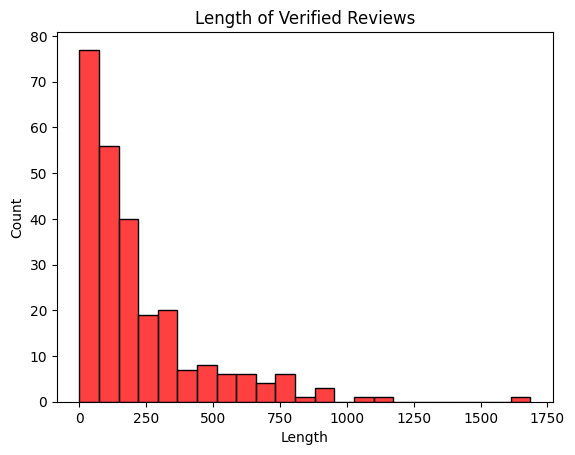

In [29]:
# length of reviews where feedback = 0
sns.histplot(data[data['feedback'] == 0]['length'], kde=False, color='red')
plt.title('Length of Verified Reviews')
plt.xlabel('Length')

Text(0.5, 0, 'Length')

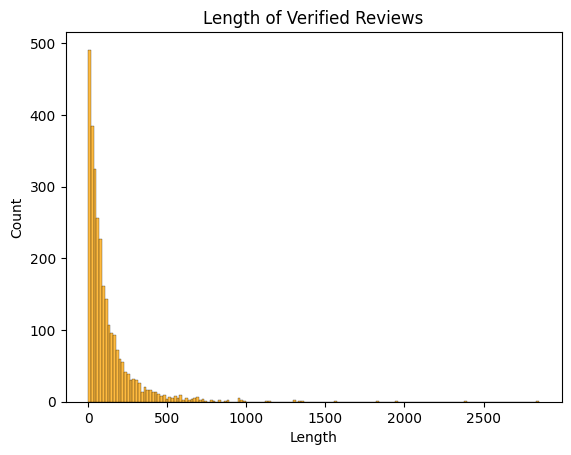

In [30]:
# length of reviews where feedback = 1
sns.histplot(data[data['feedback'] == 1]['length'], kde=False, color='orange')
plt.title('Length of Verified Reviews')
plt.xlabel('Length')

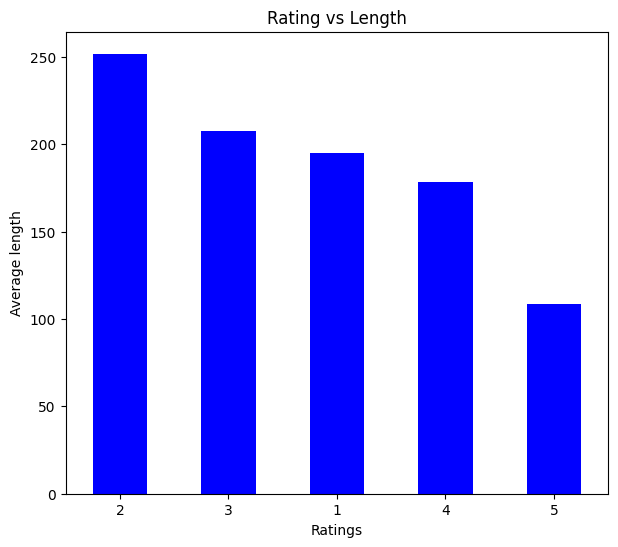

In [31]:
# length vs rating
fig = plt.figure(figsize=(7, 7))
data.groupby('rating')['length'].mean().sort_values(ascending=False).plot.bar(color='blue', figsize=(7, 6))
plt.title('Rating vs Length')
plt.xlabel('Ratings')
plt.xticks(rotation=0)
plt.ylabel('Average length')
plt.show()

In [32]:
# Combine all reviews for each feedback category and splitting them into individual words
neg_reviews = " ".join([review for review in data[data['feedback'] == 0]['verified_reviews']])
neg_reviews = neg_reviews.lower().split()

pos_reviews = " ".join([review for review in data[data['feedback'] == 1]['verified_reviews']])
pos_reviews = pos_reviews.lower().split()

#Finding words from reviews which are present in that feedback category only
unique_negative = [x for x in neg_reviews if x not in pos_reviews]
unique_negative = " ".join(unique_negative)

unique_positive = [x for x in pos_reviews if x not in neg_reviews]
unique_positive = " ".join(unique_positive)

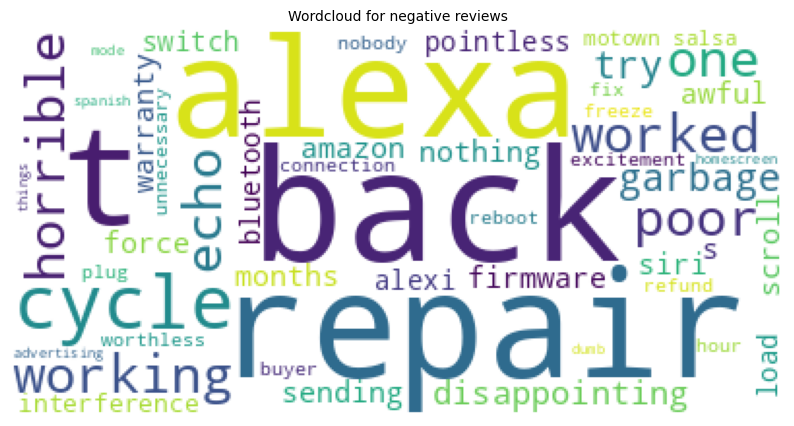

In [33]:
from wordcloud import WordCloud

wc = WordCloud(background_color='white', max_words=50)
# wordcloud for negative reviews
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_negative))
plt.title('Wordcloud for negative reviews', fontsize=10)
plt.axis('off')
plt.show()

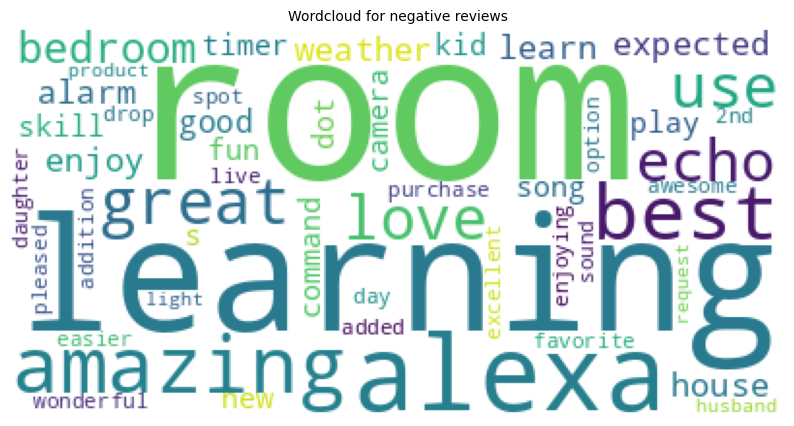

In [34]:
# wordcloud for positive reviews
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_positive))
plt.title('Wordcloud for negative reviews', fontsize=10)
plt.axis('off')
plt.show()

# Preprocessing and Model building

In [35]:
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold, RandomizedSearchCV

#import pickle
import pickle
import re


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [36]:
# To build the corpus from the 'verified_reviews' we perform the following -

# 1. Replace any non alphabet characters with a space
# 2. Covert to lower case and split into words
# 3. Iterate over the individual words and if it is not a stopword then add the lemma form of the word to the corpus

corpus = []
lemmatizer = WordNetLemmatizer()

for i in range(0, data.shape[0]):
    # Remove non-letter characters
    review = re.sub('[^a-zA-Z]', ' ', data.iloc[i]['verified_reviews'])
    # Convert to lowercase and split into words
    review = review.lower().split()
    # Lemmatize each word and remove stopwords
    review = [lemmatizer.lemmatize(word) for word in review if not word in STOPWORDS]
    # Join the words back into a single string
    review = ' '.join(review)
    # Append the cleaned review to the corpus
    corpus.append(review)

In [37]:
# using count vectorizor to convert into vectors
cv = CountVectorizer(max_features = 2500)

#Storing independent and dependent variables in X and y
X = cv.fit_transform(corpus).toarray()
y = data['feedback'].values

In [38]:
pickle.dump(cv, open('/content/Models/countVectorizer.pkl', 'wb'))

In [39]:
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (3149, 2500)
y shape: (3149,)


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 15)

print(f"X train: {X_train.shape}")
print(f"y train: {y_train.shape}")
print(f"X test: {X_test.shape}")
print(f"y test: {y_test.shape}")

X train: (2204, 2500)
y train: (2204,)
X test: (945, 2500)
y test: (945,)


In [41]:
print(f"X train max value: {X_train.max()}")
print(f"X test max value: {X_test.max()}")

X train max value: 12
X test max value: 10


In [42]:
scalar = MinMaxScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [43]:
#Saving the scaler model
pickle.dump(scalar, open('Models/scaler.pkl', 'wb'))

In [44]:
#Fitting scaled X_train and y_train on Random Forest Classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [45]:
#Accuracy of the model on training and testing data
print("Training Accuracy :", rf_model.score(X_train, y_train))
print("Testing Accuracy :", rf_model.score(X_test, y_test))

Training Accuracy : 0.9941016333938294
Testing Accuracy : 0.9439153439153439


In [46]:
#Predicting on the test set
y_preds = rf_model.predict(X_test)

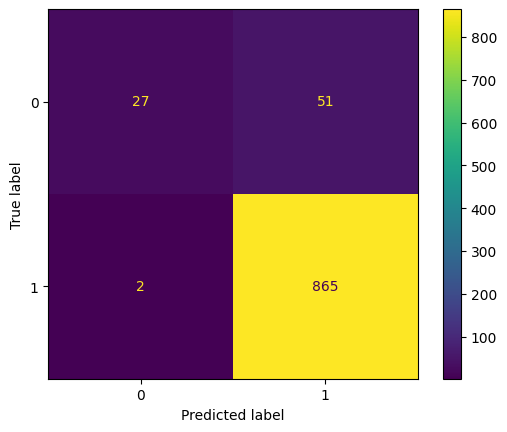

In [47]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_preds)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rf_model.classes_)
cm_display.plot()
plt.show()

In [48]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.93      0.35      0.50        78
           1       0.94      1.00      0.97       867

    accuracy                           0.94       945
   macro avg       0.94      0.67      0.74       945
weighted avg       0.94      0.94      0.93       945



our model is performing well for positive reviews but not for negative ones.

Applying grid search to get the optimal parameters on random forest

In [49]:
# Trying with different hyperparameters
rf_model_2 = RandomForestClassifier(
    n_estimators=50,
    max_depth=None,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=2,
    class_weight='balanced'
)

In [50]:
rf_model_2.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=50)

In [51]:
#Accuracy of the model on training and testing data
print("Training Accuracy :", rf_model_2.score(X_train, y_train))
print("Testing Accuracy :", rf_model_2.score(X_test, y_test))

Training Accuracy : 0.9732304900181489
Testing Accuracy : 0.9216931216931217


In [52]:
#Predicting on the test set
y_preds_2 = rf_model.predict(X_test)

In [53]:
print(classification_report(y_test, y_preds_2))

              precision    recall  f1-score   support

           0       0.93      0.35      0.50        78
           1       0.94      1.00      0.97       867

    accuracy                           0.94       945
   macro avg       0.94      0.67      0.74       945
weighted avg       0.94      0.94      0.93       945



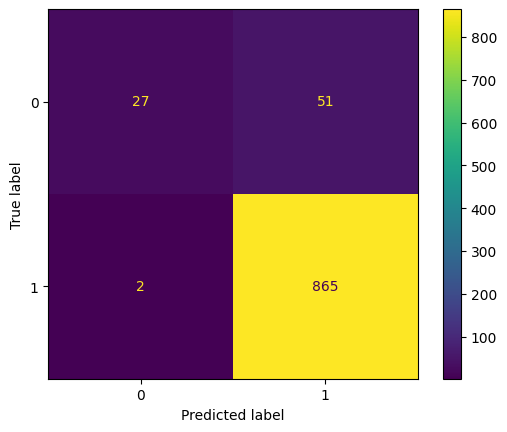

In [54]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_preds_2)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rf_model_2.classes_)
cm_display.plot()
plt.show()

It's not performing well for negative class.

Now let's use some other

In [55]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [56]:
#Accuracy of the model on training and testing data

print("Training Accuracy :", model_dt.score(X_train, y_train))
print("Testing Accuracy :", model_dt.score(X_test, y_test))

Training Accuracy : 0.9941016333938294
Testing Accuracy : 0.9185185185185185


In [57]:
print(classification_report(y_test, model_dt.predict(X_test)))

              precision    recall  f1-score   support

           0       0.51      0.51      0.51        78
           1       0.96      0.96      0.96       867

    accuracy                           0.92       945
   macro avg       0.73      0.73      0.73       945
weighted avg       0.92      0.92      0.92       945



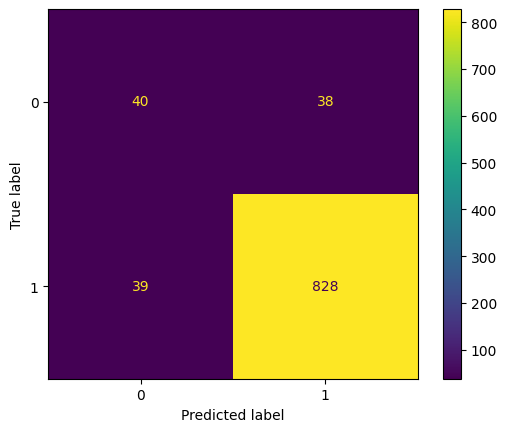

In [58]:
cm = confusion_matrix(y_test, model_dt.predict(X_test))
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_dt.classes_)
cm_display.plot()
plt.show()

In [59]:
## Using SVM
from sklearn.svm import SVC

# Create an SVM model with default parameters
svm_model = SVC(class_weight='balanced')  # Use 'balanced' for class weight
svm_model.fit(X_train, y_train)

SVC(class_weight='balanced')

In [60]:
#Accuracy of the model on training and testing data
print("Training Accuracy :", svm_model.score(X_train, y_train))
print("Testing Accuracy :", svm_model.score(X_test, y_test))

Training Accuracy : 0.9909255898366606
Testing Accuracy : 0.9407407407407408


In [61]:
# Predict on the test set
y_pred_svm = svm_model.predict(X_test)

In [62]:
# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred_svm))
print("Accuracy:", accuracy_score(y_test, y_pred_svm))

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.32      0.47        78
           1       0.94      1.00      0.97       867

    accuracy                           0.94       945
   macro avg       0.92      0.66      0.72       945
weighted avg       0.94      0.94      0.93       945

Accuracy: 0.9407407407407408


In [66]:
## fine tunning the SVM
param_dist = {
    'C': np.logspace(-3, 3, 10),               # Regularization parameter
    'gamma': ['scale', 'auto'] + list(np.logspace(-3, 3, 10)),  # Kernel coefficient
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  # Kernel types
    'degree': [2, 3, 4],                       # Degree of the polynomial kernel
    'class_weight': ['balanced'],        # Class weight options
}

# Initialize the SVM model
svm = SVC()

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    svm, param_distributions=param_dist,
    n_iter=100,
    cv=3,        # 5-fold cross-validation
    verbose=2,
    n_jobs=-1,
    random_state=42
)

In [67]:
%%time
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
CPU times: user 20.5 s, sys: 2.6 s, total: 23.1 s
Wall time: 20min 16s


RandomizedSearchCV(cv=3, estimator=SVC(), n_iter=100, n_jobs=-1,
                   param_distributions={'C': array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03]),
                                        'class_weight': ['balanced'],
                                        'degree': [2, 3, 4],
                                        'gamma': ['scale', 'auto', 0.001,
                                                  0.004641588833612777,
                                                  0.021544346900318832, 0.1,
                                                  0.46415888336127775,
                                                  2.154434690031882, 10.0,
                                                  46.41588833612773,
                                                  215.44346900318823, 1000.0],
                                        'kernel': ['linear', 'rbf', 'poly',
                                                   'sigmoid']},
                   random_state=42, verbose=2)

In [68]:
# Best parameters found by RandomizedSearchCV
print("Best Parameters:\n", random_search.best_params_)

Best Parameters:
 {'kernel': 'sigmoid', 'gamma': 0.021544346900318832, 'degree': 3, 'class_weight': 'balanced', 'C': 2.154434690031882}


In [69]:
# Predict with the best estimator
best_svm = random_search.best_estimator_
y_pred_best = best_svm.predict(X_test)

# Evaluate the model with the best parameters
print("Classification Report:\n", classification_report(y_test, y_pred_best))
print("Accuracy:", accuracy_score(y_test, y_pred_best))

Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.53      0.54        78
           1       0.96      0.96      0.96       867

    accuracy                           0.93       945
   macro avg       0.76      0.74      0.75       945
weighted avg       0.92      0.93      0.93       945

Accuracy: 0.9259259259259259
